['MiniGrid-BlockedUnlockPickup-v0', 'MiniGrid-LavaCrossingS9N1-v0', 'MiniGrid-LavaCrossingS9N2-v0', 'MiniGrid-LavaCrossingS9N3-v0', 'MiniGrid-LavaCrossingS11N5-v0', 'MiniGrid-SimpleCrossingS9N1-v0', 'MiniGrid-SimpleCrossingS9N2-v0', 'MiniGrid-SimpleCrossingS9N3-v0', 'MiniGrid-SimpleCrossingS11N5-v0', 'MiniGrid-DistShift1-v0', 'MiniGrid-DistShift2-v0', 'MiniGrid-DoorKey-5x5-v0', 'MiniGrid-DoorKey-6x6-v0', 'MiniGrid-DoorKey-8x8-v0', 'MiniGrid-DoorKey-16x16-v0', 'MiniGrid-Dynamic-Obstacles-5x5-v0', 'MiniGrid-Dynamic-Obstacles-Random-5x5-v0', 'MiniGrid-Dynamic-Obstacles-6x6-v0', 'MiniGrid-Dynamic-Obstacles-Random-6x6-v0', 'MiniGrid-Dynamic-Obstacles-8x8-v0', 'MiniGrid-Dynamic-Obstacles-16x16-v0', 'MiniGrid-Empty-5x5-v0', 'MiniGrid-Empty-Random-5x5-v0', 'MiniGrid-Empty-6x6-v0', 'MiniGrid-Empty-Random-6x6-v0', 'MiniGrid-Empty-8x8-v0', 'MiniGrid-Empty-16x16-v0', 'MiniGrid-Fetch-5x5-N2-v0', 'MiniGrid-Fetch-6x6-N2-v0', 'MiniGrid-Fetch-8x8-N3-v0', 'MiniGrid-FourRooms-v0', 'MiniGrid-GoToDoor-5x5-

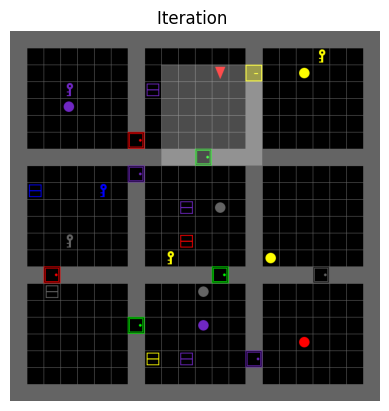


Knowledge Base: 
Room 0:
  purple key is at (3, 3)
  purple ball is at (3, 4)
  red door is at (7, 6) and is currently closed
Room 1:
  purple box is at (8, 3)
  yellow door is at (14, 2) and is currently locked
  red door is at (7, 6) and is currently closed
  green door is at (11, 7) and is currently closed
Room 2:
  yellow key is at (18, 1)
  yellow ball is at (17, 2)
  yellow door is at (14, 2) and is currently locked
Room 3:
  blue box is at (1, 9)
  blue key is at (5, 9)
  grey key is at (3, 12)
  purple door is at (7, 8) and is currently closed
  red door is at (2, 14) and is currently closed
Room 4:
  purple box is at (10, 10)
  grey ball is at (12, 10)
  red box is at (10, 12)
  yellow key is at (9, 13)
  green door is at (11, 7) and is currently closed
  purple door is at (7, 8) and is currently closed
  green door is at (12, 14) and is currently closed
Room 5:
  yellow ball is at (15, 13)
  grey door is at (18, 14) and is currently closed
Room 6:
  grey box is at (2, 15)
  

In [59]:
%reload_ext autoreload
%autoreload 2
import random
import gymnasium as gym
import minigrid
import matplotlib.pyplot as plt
from VLA2Systems.utils import (
    print_grid,
    render_env
)
from VLA2Systems.knowledge_base import KnowledgeBase
import imageio

def save_env_image(env, filename="env_image.png"):
    """Save the environment image to a file."""
    frame = env.render()
    imageio.imwrite(filename, frame)

# # List all available MiniGrid environments
env_list = [env_id for env_id in gym.envs.registry if "MiniGrid" in env_id]
print(env_list)
# Randomly select an environment
env_name = random.choice(env_list)
# print(f"Selected Environment: {env_name}")
# env_name = "BabyAI-ActionObjDoor-v0"
# env_name = "MiniGrid-DoorKey-16x16-v0"
# env_name = "BabyAI-BlockedUnlockPickup-v0"
# env_name = "BabyAI-FindObjS5-v0"
# env_name = "BabyAI-BossLevel-v0"
# env_name = "MiniGrid-MultiRoom-N6-v0"
# env_name = "MiniGrid-MultiRoom-N4-S5-v0"
env_name = "BabyAI-SynthLoc-v0"

# seed = 69
seed = random.randint(1, 1000)
# seed = 232 # 152, 232
seed = 39
print(f"seed is {seed}")
# Create the environment
env = gym.make(env_name, render_mode="rgb_array")

# Reset the environment to initialize it
env.reset(seed=seed)
# env.reset()
knowledge_base = KnowledgeBase(env)
# Print the grid
# print("\nGrid Map:")
# print_grid(knowledge_base.grid_data)
# Render the environment dynamically
fig, ax = plt.subplots()
render_env(env, ax, 2)
# Save the environment image
save_env_image(env, filename="env_image.png")

print(f"\nKnowledge Base: \n{knowledge_base}\n")
with open("./file.txt",'w') as file:
    file.write(str(knowledge_base))


In [60]:
# knowledge_base.KB['rooms'][0][-1]['state'] = 'open'
# knowledge_base.KB['rooms'][0][-1]['state'] = 'closed'
# knowledge_base.KB['rooms'][0][-1]['state'] = 'locked'
# knowledge_base.KB['connections'][0]
# print(knowledge_base.KB['connections'][0][2]['state'])

# print(knowledge_base)

In [65]:
%reload_ext autoreload
%autoreload 2
from VLA2Systems.task_planning import RobotPlanner
print("Planner")
robot_position = env.unwrapped.agent_pos
robot_direction = env.unwrapped.agent_dir
start_location = int(robot_direction), tuple((int(robot_position[0]), int(robot_position[1])))
# start_location = 0, (1, 11)

print(f"start location is: {start_location}")

planner = RobotPlanner(knowledge_base, start_location=start_location, verbose=0)


Planner
start location is: (1, (12, 2))


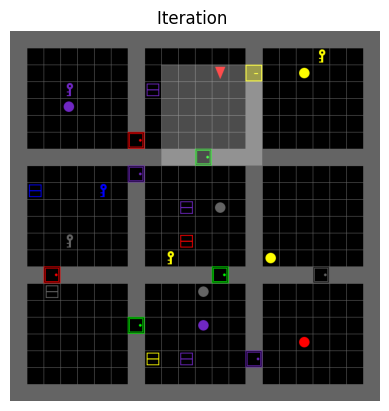

Task is: go to purple box in (10, 19)
Step 1: Go to green door
Step 2: Open door
Step 3: Go to purple door
Step 4: Open door
Step 5: Go to red door
Step 6: Open door
Step 7: Go to green door
Step 8: Open door
Step 9: Go to green door
Step 10: Open door
Step 11: Go to purple box


In [66]:
# plan = planner.plan_go_to('red', 'door')
# plan = planner.plan_go_to('green', 'key')
# plan = planner.plan_go_to('yellow', 'key')
# plan = planner.plan_go_to('blue', 'box')
# plan = planner.plan_go_to('green', 'goal')
plan = planner.plan_go_to('purple', 'box', (10, 19))
# print(plan)
if plan:
    fig, ax = plt.subplots()
    render_env(env, ax, 2)
    print("Task is: go to purple box in (10, 19)")
    print(planner)
else:
    print("No valid plan found.")

In [58]:
# plan = planner.plan_pick_up('yellow', 'key')
# if plan:
#     print(planner)
# else:
#     print("No valid plan found.")